# CIFAR-10 with Keras

本練習目的為介紹Keras中各種model和layer的使用方法，並將其應用在CIFAR-10圖片資料上做分類。本練習包含以下部分:
1. **Keras** 介紹Keras以及常用的model和layer 
2. **Cifar-10** 介紹資料組成以及如何使用資料
3. **模型範例** 利用DNN和CNN對Cifar-10做分類

## 1. Keras 

keras 是一種高階的深度學習工具，由python撰寫，可以使用少量的程式碼來建立深度學習的模型。keras 在使用上必須配合後端引擎，目前支援如Theano、CNTK和Tensorflow等，目前大多數keras應用都是Tensorflow backend的。

### 1.1 Model 介紹

####  [Sequential Model](https://keras.io/models/sequential/)

Sequential 是keras中一種常用的model型態，宣告完Sequential()之後可以使用add()函數來將Layer按照順序加入model中，被加入的layer就會依照加入的順序被執行出來。

### 1.2 Layer 介紹

####  [Dense Layer](https://keras.io/layers/core/#dense)

Dense Layer 就是普通型態的一層神經網路，假設X是輸入資料，則Dense Layer會學習一組參數W和常數b，使得經過這層的輸出等於 W*X + b。  

####  [Convolution Layer](https://keras.io/layers/convolutional/#conv2d)

Convolution Layer 是使用convolution來實作一層神經網路，有關於convolution的說明見[此網址](https://goo.gl/MDJbKt)。
  
在影像、圖片應用上，Convolution的表現比普通Dense Layer更為優異。  

#### [MaxPooling](https://keras.io/layers/pooling/#maxpooling1d)

Pooling的機制是對眾多圖片的Pixel做篩選，篩選出分類器認為有用的局部特徵(feature)，篩選的機制有很多種，例如該Pixel在該範圍內的平均值、最大、最小值等等，在MaxPooling我們使用的是取局部最大值。

## 2. CIfar-10

CIFAR的全名為Canadian Institute for Advanced Research，是由加拿大政府出資並由多位科學家、工程師收集而成的圖片資料庫。  
CIFAR-10由 60000張 32X32 的RGB彩色圖片構成，共10種分類，目前此數據用於競賽上，50000張為訓練資料，10000張為測試資料。  
![title](./pic.png)<center>(Source: http://www.cs.toronto.edu/~kriz/cifar.html)</center>

keras除了神經網路訓練外，也提供整理好的[CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification)資料，只要透過import就可以拿到切好的training、testing資料。

Category: [6]


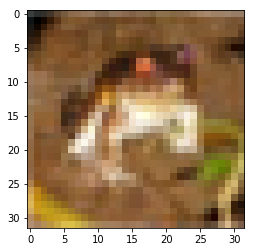

In [3]:
%matplotlib inline

import matplotlib
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

matplotlib.pyplot.imshow(x_train[0])
print('Category:', y_train[0])

## 3.模型範例
以下是兩個類神經網路在CIFAR-10資料上的實作，DNN神經網路只使用dense layer來學習cifar-10的圖片，CNN神經網路則使用convolution來學習，由於cifar-10的圖片比較複雜且為彩色，CNN相較於DNN而言更容易得到好的結果。  
  
而若依照以下範例的設定，DNN神經網路經過20輪訓練後可以到達約 40% validation_accracy，而CNN神經網路可以達到 50% validation_accuracy。  

請更改DNN或是CNN的架構內容來讓模型更精進，可以更改的方式為  
1. 更改參數內容  
    epochs: 訓練幾輪  
    batch_size: 每一個step訓練所使用的資料數量  
    learning_rate: 學習的精細度  
2. 增加神經網路層數
3. 更改神經元數量

### 3.1 DNN神經網路

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_dnn = x_train[:10000].astype('float32')
x_te_dnn = x_test.astype('float32')

x_tr_dnn = x_tr_dnn.reshape(-1, 3072)
x_te_dnn = x_te_dnn.reshape(-1, 3072)

x_tr_dnn /= 255
x_te_dnn /= 255

y_tr_dnn = to_categorical(y_train[:10000], num_classes=10)
y_te_dnn = to_categorical(y_test, num_classes=10)

#---------------------參數-----------------------------#

epochs = 20
batch_size = 128 
learning_rate = 0.001

#------------------------------------------------------#

#宣告Sequential model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3072,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_tr_dnn, y_tr_dnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_dnn, y_te_dnn))

### 3.2 CNN神經網路

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_cnn = x_train[:10000].astype('float32')
x_te_cnn = x_test.astype('float32')

x_tr_cnn /= 255
x_te_cnn /= 255

y_tr_cnn = to_categorical(y_train[:10000], num_classes=10)
y_te_cnn = to_categorical(y_test, num_classes=10)

#---------------------參數-----------------------------#

epochs = 20
batch_size = 128 
learning_rate = 0.001

#------------------------------------------------------#


#宣告Sequential model
model = Sequential()

# 一層一層加入Layer
# Conv2D的宣告方式為 Conv2D(神經元數量, (Filter size))
# keras規定第一層需要宣告input data的size，而CIFAR-10的size為(32, 32, 3)
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

#------------------------------------------------------#

#--------------請多加幾層 Conv2D or Pooling-------------#

#------------------------------------------------------#

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_tr_cnn, y_tr_cnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_cnn, y_te_cnn))